<a href="https://colab.research.google.com/github/AbhishekJoshi93/SentimentAnalysis/blob/master/SentimentAnalysisForRacistTweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective**
The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist sentiment associated with it. So, the task is to classify racist tweets from other tweets.

# **Dataset**
Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist and label '0' denotes the tweet is not racist, your objective is to predict the labels on the test dataset. 

# **Import**

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

# **Upload Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
from google.colab import files
uploaded_test = files.upload()

Saving test.csv to test.csv


In [53]:
import io
train = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
train_original = train.copy()
test = pd.read_csv(io.StringIO(uploaded_test['test.csv'].decode('utf-8')))
test_original = test.copy()

# **Overview Of Dataset**
**Train** -> We have 3 attributes present in our dataset and a total of 31962 labeled tweets.


1.   ID
2.   Label
3.   Tweets



**Test** -> We have 2 attributes present in our dataset and a total of 17197 labeled tweets.


1.   ID
2.   Tweets



In [54]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [55]:
test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


# **Combine**
Pandas dataframe.append() function is used to append rows of other dataframe to the end of the given dataframe, returning a new dataframe object.

In [56]:
combine = train.append(test,ignore_index=True,sort=True)
combine

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."


# **Pattern Function**

In [57]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes pattern from the tweet
    for i in r:
        text = re.sub(i,"",text)
    
    return text

# **Removing Twitter Handles**

Here NumPy Vectorization ‘**np.vectorize()**’ is used because it is much more faster than the conventional for loops when working on datasets of medium to large sizes.

In [58]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")
combine

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads...","happy, at work conference: right mindset leads..."


## **Removing Punctuation, Numbers And Special Characters**

Here '**str.replace()**' is used to convert the punctuation, number and special characters with white space.

In [59]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")
combine

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio omg am...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads...


# **Removing Stop Words**

Here '**lambda**'(The expression is evaluated and returned) and '**join()**' is used to string from evaluated object.

In [60]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combine

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #trump...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like mermaid #hairflip #neverready #fo...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today #ohio used words li...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy work conference right mindset leads cult...


# **Tokenization**
Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens. We tokenize our tweets because we will apply Stemming in the next step.

In [61]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, cause, they, offer, wh...
2                                  [bihday, your, majesty]
3                         [#model, love, take, with, time]
4                       [factsguide, society, #motivation]
                               ...                        
49154    [thought, factory, left, right, polarisation, ...
49155    [feeling, like, mermaid, #hairflip, #neverread...
49156    [#hillary, #campaigned, today, #ohio, used, wo...
49157    [happy, work, conference, right, mindset, lead...
49158    [song, glad, free, download, #shoegaze, #newmu...
Name: Tidy_Tweets, Length: 49159, dtype: object

# **Stemming**
Stemming is a process of stripping the suffixes from a tokenized tweet.

In [62]:
from nltk import PorterStemmer
ps = PorterStemmer()

In [63]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])
tokenized_tweet

0        [when, father, dysfunct, selfish, drag, kid, i...
1        [thank, #lyft, credit, caus, they, offer, whee...
2                                  [bihday, your, majesti]
3                         [#model, love, take, with, time]
4                             [factsguid, societi, #motiv]
                               ...                        
49154    [thought, factori, left, right, polaris, #trum...
49155    [feel, like, mermaid, #hairflip, #neverreadi, ...
49156    [#hillari, #campaign, today, #ohio, use, word,...
49157    [happi, work, confer, right, mindset, lead, cu...
49158    [song, glad, free, download, #shoegaz, #newmus...
Name: Tidy_Tweets, Length: 49159, dtype: object

# **Combining Back To Tweet**

In [64]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [65]:
combine['Tidy_Tweets'] = tokenized_tweet
combine

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factori left right polaris #trump #use...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feel like mermaid #hairflip #neverreadi #forma...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillari #campaign today #ohio use word like a...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happi work confer right mindset lead cultur de...


# **Word Cloud**

In [66]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

# **Separating Words**

In [67]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])

# **Making Mask**

In [68]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

In [69]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc2 = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# **Plot Word Cloud Positive Word**

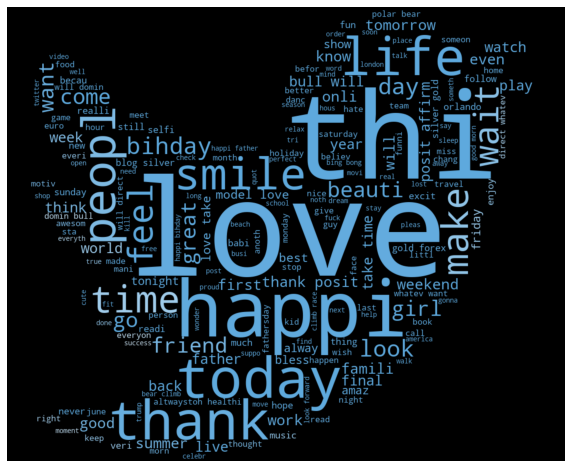

In [70]:
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.axis('off')
plt.show()

# **Plot Word Cloud Negative Word**

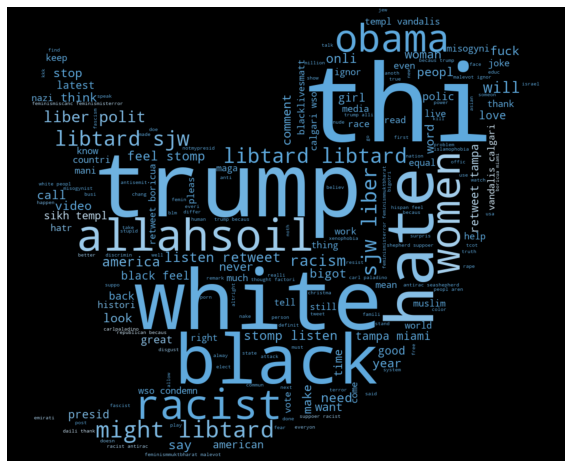

In [71]:
plt.figure(figsize=(10,20))
plt.imshow(wc2.recolor(color_func=image_colors),interpolation="hamming")
plt.axis('off')
plt.show()

# **Extract Hashtags**

In [72]:
def Hashtags_Extract(x):
    hashtags=[]
    
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

# **Positive Hashtags**

In [73]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])
ht_positive_unnest = sum(ht_positive,[])

In [74]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

# **Negative Hashtags**

In [75]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])
ht_negative_unnest = sum(ht_negative,[])

In [76]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

# **Barplot**

In [77]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})
df_positive.head(10)

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
5,motiv,202
6,allshowandnogo,1
7,school,30
8,exam,9
9,hate,27


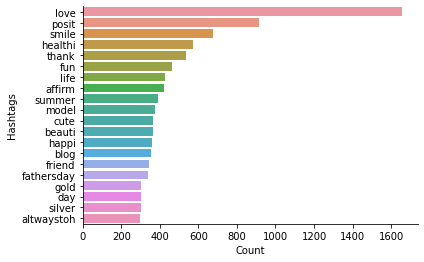

In [78]:
df_positive_plot = df_positive.nlargest(20,columns='Count')
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [79]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})
df_negative.head(10)

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,8
9,xenophobia,12


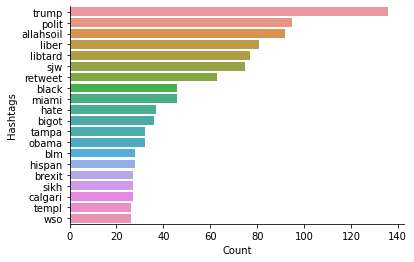

In [80]:
df_negative_plot = df_negative.nlargest(20,columns='Count') 
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

# **Extracting Features from cleaned Tweets**

# **Bag Of Word**
Bag of Words is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set. This way of training features containing term frequencies of each word in each document. This is called bag-of-words approach since the number of occurrence and not sequence or order of words matters in this approach. So,let’s apply this word embedding technique to our available dataset. We have a package called CountVectorizer to perform this task.

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])
df_bow = pd.DataFrame(bow.todense())
df_bow

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **TF-IDF**
TF-IDF stands for Term Frequency-Inverse Document Frequency, and the TF-IDF weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. 


1.   The first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document.
2.   The second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF-IDF = TF * IDF

We have a package available for this in Scikit-Learn known as TfidfVectorizer.


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.532509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624002,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.411886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Splitting our dataset into Training and Validation Set**

In [83]:
train_bow = bow[:31962]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [84]:
train_tfidf_matrix = tfidf_matrix[:31962]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [85]:
from sklearn.model_selection import train_test_split

# **Bag Of Word Split**

In [86]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=41)

# **TF-IDF Split**

In [87]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=41)

# **Applying ML Models**



# 1.   **Supervised Machine Learning**

Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output.

Y = f(X)

The goal is to approximate the mapping function so well that when you have new input data (x) that you can predict the output variables (Y) for that data.

It is called supervised learning because the process of an algorithm learning from the training dataset can be thought of as a teacher supervising the learning process. We know the correct answers, the algorithm iteratively makes predictions on the training data and is corrected by the teacher. Learning stops when the algorithm achieves an acceptable level of performance.

Supervised learning problems can be further grouped into regression and classification problems.

Classification: A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease”.

Regression: A regression problem is when the output variable is a real value, such as “dollars” or “weight”.
Some common types of problems built on top of classification and regression include recommendation and time series prediction respectively.

Some popular examples of supervised machine learning algorithms are:

Linear regression for regression problems.

Random forest for classification and regression problems.

Support vector machines for classification problems.

# 2.   **Unsupervised Machine Learning**

Unsupervised learning is where you only have input data (X) and no corresponding output variables.

The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.

These are called unsupervised learning because unlike supervised learning above there is no correct answers and there is no teacher. Algorithms are left to their own devises to discover and present the interesting structure in the data.

Unsupervised learning problems can be further grouped into clustering and association problems.

Clustering: A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior.

Association:  An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y.
Some popular examples of unsupervised learning algorithms are:

k-means for clustering problems.

Apriori algorithm for association rule learning problems.


# **Logistic Regression**

In [88]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=41,solver='lbfgs')

# **Bag-of-Words Features**
Fitting the Logistic Regression Model.

In [89]:
Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=41, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the probabilities.

In [90]:
prediction_bow = Log_Reg.predict_proba(x_valid_bow)
prediction_bow

array([[8.03877888e-01, 1.96122112e-01],
       [9.94036645e-01, 5.96335534e-03],
       [9.86475450e-01, 1.35245500e-02],
       ...,
       [9.81164586e-01, 1.88354139e-02],
       [9.99395116e-01, 6.04884313e-04],
       [9.81920565e-01, 1.80794349e-02]])

In [92]:
prediction_int = prediction_bow[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)
prediction_int

array([0, 0, 0, ..., 0, 0, 0])

Calculating the Accuracy

In [93]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_valid_bow,prediction_int))
print(accuracy_score(y_valid_bow,prediction_int))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8903
           1       0.64      0.47      0.54       686

    accuracy                           0.94      9589
   macro avg       0.80      0.72      0.75      9589
weighted avg       0.94      0.94      0.94      9589

0.9427468974867035


# **TF-IDF Features**
Fitting the Logistic Regression Model.

In [94]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=41, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the probabilities.

In [95]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)
prediction_tfidf

array([[0.84836347, 0.15163653],
       [0.97992739, 0.02007261],
       [0.96882466, 0.03117534],
       ...,
       [0.96685381, 0.03314619],
       [0.99488455, 0.00511545],
       [0.99063123, 0.00936877]])

In [96]:
prediction_int = prediction_tfidf[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)
prediction_int

array([0, 0, 0, ..., 0, 0, 0])

Calculating the Accuracy

In [97]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_valid_tfidf,prediction_int))
print(accuracy_score(y_valid_tfidf,prediction_int))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8903
           1       0.68      0.45      0.54       686

    accuracy                           0.95      9589
   macro avg       0.82      0.72      0.76      9589
weighted avg       0.94      0.95      0.94      9589

0.9455626238398165


# **Decision Trees**

In [98]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=41)

# **Bag-of-Words Features**
Fitting the Decision Tree model.

In [99]:
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=41, splitter='best')

Predicting the probabilities.

In [100]:
dct_bow = dct.predict_proba(x_valid_bow)
dct_bow

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.95652174, 0.04347826],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [101]:
dct_bow=dct_bow[:,1]>=0.3
dct_int_bow=dct_bow.astype(np.int)
dct_int_bow

array([0, 0, 0, ..., 0, 0, 0])

Calculating the Accuracy

In [102]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_valid_bow,dct_int_bow))
print(accuracy_score(y_valid_bow,dct_int_bow))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      8903
           1       0.43      0.56      0.49       686

    accuracy                           0.92      9589
   macro avg       0.70      0.75      0.72      9589
weighted avg       0.93      0.92      0.92      9589

0.9154239232453854


# **TF-IDF Features**
Fitting the Decision Tree model

In [103]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=41, splitter='best')

Predicting the probabilities.

In [104]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)
dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [105]:
dct_tfidf=dct_tfidf[:,1]>=0.3
dct_int_tfidf=dct_tfidf.astype(np.int)
dct_int_tfidf

array([0, 0, 0, ..., 0, 0, 0])

Calculating the Accuracy

In [106]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_valid_tfidf,dct_int_tfidf))
print(accuracy_score(y_valid_tfidf,dct_int_tfidf))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8903
           1       0.58      0.49      0.53       686

    accuracy                           0.94      9589
   macro avg       0.77      0.73      0.75      9589
weighted avg       0.93      0.94      0.94      9589

0.9377411617478361


# ***`Highest Accuracy with Logistic Regression TF-IDF 0.9455626238398165`***

In [116]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=0)  
svm.fit(x_train_bow, y_train_bow) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [117]:
prediction_bow = svm.predict(x_valid_bow)  
prediction_bow

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_valid_bow,prediction_bow))
print(accuracy_score(y_valid_bow,prediction_bow))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8903
           1       0.77      0.36      0.49       686

    accuracy                           0.95      9589
   macro avg       0.86      0.67      0.73      9589
weighted avg       0.94      0.95      0.94      9589

0.9465011992908541


In [128]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=0)  
svm.fit(x_train_tfidf, y_train_tfidf) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [129]:
prediction_tfidf = svm.predict(x_valid_tfidf)  
prediction_tfidf

array([0, 0, 0, ..., 0, 0, 0])

In [130]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_valid_tfidf,prediction_tfidf))
print(accuracy_score(y_valid_tfidf,prediction_tfidf))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8903
           1       0.80      0.33      0.47       686

    accuracy                           0.95      9589
   macro avg       0.88      0.66      0.72      9589
weighted avg       0.94      0.95      0.94      9589

0.9463969131296277


In [122]:
from sklearn.ensemble import RandomForestClassifier  
rfc = RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rfc.fit(x_train_bow, y_train_bow)  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [123]:
prediction_bow = rfc.predict(x_valid_bow)  
prediction_bow

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_valid_bow,prediction_bow))
print(accuracy_score(y_valid_bow,prediction_bow))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8903
           1       0.59      0.51      0.55       686

    accuracy                           0.94      9589
   macro avg       0.78      0.74      0.76      9589
weighted avg       0.94      0.94      0.94      9589

0.9394097403274585


In [125]:
from sklearn.ensemble import RandomForestClassifier  
rfc = RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rfc.fit(x_train_tfidf, y_train_tfidf)  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [126]:
prediction_tfidf = rfc.predict(x_valid_tfidf)  
prediction_tfidf

array([0, 0, 0, ..., 0, 0, 0])

In [127]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_valid_tfidf,prediction_tfidf))
print(accuracy_score(y_valid_tfidf,prediction_tfidf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8903
           1       0.78      0.43      0.55       686

    accuracy                           0.95      9589
   macro avg       0.87      0.71      0.76      9589
weighted avg       0.94      0.95      0.94      9589

0.9502555010950047
